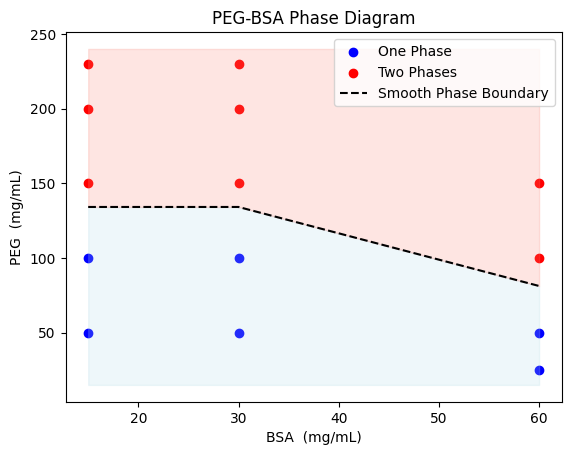

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# 你的数据
data = {
    'Type': ['one', 'one', 'two', 'two', 'two', 'one', 'one', 'two', 'two', 'two', 'one', 'one', 'two', 'two'],
    'BSA_Concentration': [15, 15, 15, 15, 15, 30, 30, 30, 30, 30, 60, 60, 60, 60],
    'PEG_Concentration': [50, 100, 150, 200, 230, 50, 100, 150, 200, 230, 25, 50, 100, 150]
}

df = pd.DataFrame(data)

# 分离两个相区的数据
one_phase = df[df['Type'] == 'one']
two_phase = df[df['Type'] == 'two']

# 计算每个BSA浓度级别的"one"和"two"相区PEG浓度的平均值的中点
bsa_levels = sorted(df['BSA_Concentration'].unique())
middle_points = []

for level in bsa_levels:
    one_avg = one_phase[one_phase['BSA_Concentration'] == level]['PEG_Concentration'].mean()
    two_avg = two_phase[two_phase['BSA_Concentration'] == level]['PEG_Concentration'].mean()
    middle_points.append((level, (one_avg + two_avg) / 2))

middle_points = np.array(middle_points)

# 线性插值来生成平滑的分界线
f_linear = interp1d(middle_points[:,0], middle_points[:,1], kind='linear', fill_value='extrapolate')
xnew = np.linspace(np.min(bsa_levels), np.max(bsa_levels), num=100, endpoint=True)

# 绘制原始数据点
plt.scatter(one_phase['BSA_Concentration'], one_phase['PEG_Concentration'], color='blue', label='One Phase')
plt.scatter(two_phase['BSA_Concentration'], two_phase['PEG_Concentration'], color='red', label='Two Phases')

# 绘制平滑的分界线
plt.plot(xnew, f_linear(xnew), 'k--', label='Smooth Phase Boundary')

# 填充两个相区域
plt.fill_between(xnew, f_linear(xnew), df['PEG_Concentration'].min() - 10, color='lightblue', alpha=0.2)
plt.fill_between(xnew, f_linear(xnew), df['PEG_Concentration'].max() + 10, color='salmon', alpha=0.2)

plt.title('PEG-BSA Phase Diagram')
plt.xlabel('BSA  (mg/mL)')
plt.ylabel('PEG  (mg/mL)')
plt.legend()
plt.show()
